# Potential Flow Theory 
## Submitted by Yogesh(200010090)

interactive(children=(FloatSlider(value=1.0, description='t', max=2.0, step=0.05), Output()), _dom_classes=('w…

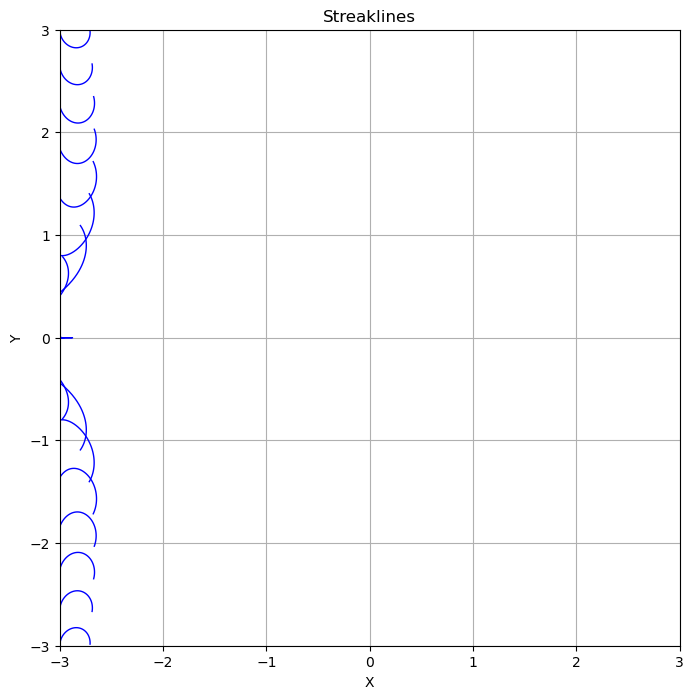

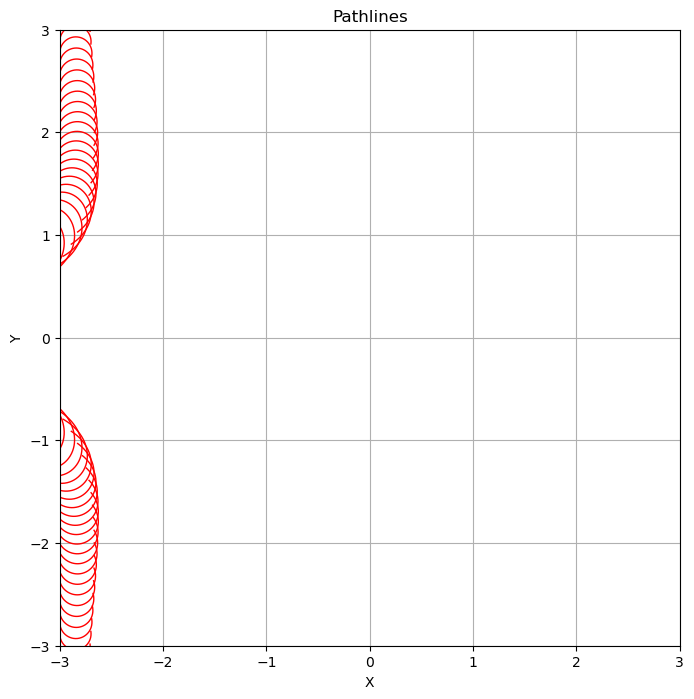

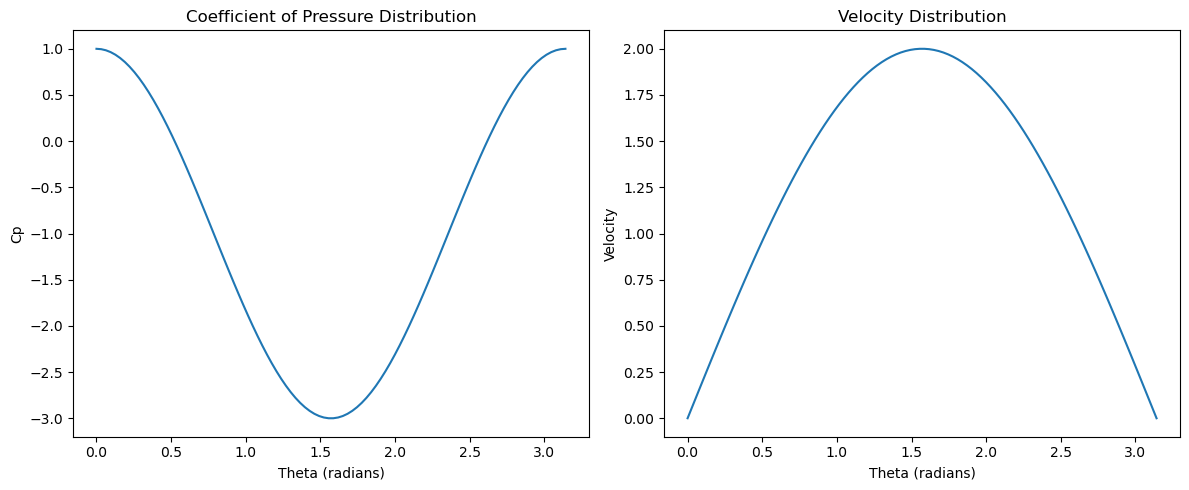

interactive(children=(FloatSlider(value=5.0, description='T', max=10.0, step=0.5), Output()), _dom_classes=('w…

interactive(children=(FloatSlider(value=5.0, description='T', max=10.0, step=0.5), Output()), _dom_classes=('w…

interactive(children=(FloatSlider(value=0.0, description='T', max=5.0, min=-5.0, step=0.5), Output()), _dom_cl…

interactive(children=(FloatSlider(value=0.0, description='T', max=5.0, min=-5.0, step=0.5), Output()), _dom_cl…

<Figure size 640x480 with 0 Axes>

In [5]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from ipywidgets import interact

# Project: Potential Flow Analysis for Incompressible Fluid Mechanics

# Define cylinder parameters
cylinder_radius = 1.0
cylinder_velocity = 1.0

# Define velocity components u and v for the flow past a cylinder
def u(r, t):
    x1 = r[0] + cylinder_velocity * t
    y = r[1]
    return -(x1**2 - y**2) / (x1**2 + y**2)**2

def v(r, t):
    x1 = r[0] + cylinder_velocity * t
    y = r[1]
    return -2 * x1 * y / (x1**2 + y**2)**2

# Define velocity field
def vel(r, t):
    return np.array([u(r, t), v(r, t)])

# Create a meshgrid for visualization
x_range = np.linspace(-3, 3, 50)
y_range = np.linspace(-3, 3, 20)
x, y = np.meshgrid(x_range, y_range)

# Define functions for streamlines, streaklines, and pathlines
def plot_streamlines(t):
    u_t = u([x, y], t)
    v_t = v([x, y], t)
    plt.figure(figsize=(8, 8))
    plt.streamplot(x, y, u_t, v_t, density=1.5, linewidth=1, color='k')
    plt.title(f'Streamlines at t = {t}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.grid()

def plot_streaklines():
    dt = 0.06
    n = 100
    T = n * dt
    plt.figure(figsize=(8, 8))
    for j in range(20):
        ic = np.array([-3, -3 + j * 6 / 19])
        sx, sy = [], []
        for i in range(n):
            start = i * dt
            res = odeint(vel, ic, [start, T], mxstep=10000, full_output=1)
            sol = res[0]  # Extract the solution array
            sx.append(sol[-1, 0])  # Append the last x-coordinate
            sy.append(sol[-1, 1])  # Append the last y-coordinate
        plt.plot(sx, sy, 'b-', linewidth=1)
    plt.title('Streaklines')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.grid()

    
def plot_pathlines():
    plt.figure(figsize=(8, 8))
    for a in range(50):
        ic = np.array([-3, -3 + a * 6 / 49])
        times = np.linspace(0, 6, 500)
        res = odeint(vel, ic, times, mxstep=10000, full_output=1)
        sol = res[0]  # Extract the solution array
        sx, sy = sol.T
        plt.plot(sx, sy, 'r-', linewidth=1)
    plt.title('Pathlines')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.grid()



# Interact with the plots using a widget
interact(plot_streamlines, t=(0, 2, 0.05))
plot_streaklines()
plot_pathlines()

# ---------------------------------------------------
# Potential Flow Analysis for Incompressible Fluid Mechanics
# ---------------------------------------------------

# Define constants and parameters
U = 1       # Free stream velocity
a = 1       # Cylinder radius
rho = 1000  # Density of the fluid
PO = 100000 # Reference pressure

# Velocity and Coefficient of Pressure Distribution

# Create a range of angles
t = np.linspace(0, np.pi, 100)

# Calculate velocity and coefficient of pressure
def cp(t):
    return (1 - 4 * (np.sin(t) ** 2))

def v(t):
    return 2 * np.sin(t)

# Plotting the coefficient of pressure and velocity distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, cp(t))
plt.title('Coefficient of Pressure Distribution')
plt.xlabel('Theta (radians)')
plt.ylabel('Cp')

plt.subplot(1, 2, 2)
plt.plot(t, v(t))
plt.title('Velocity Distribution')
plt.xlabel('Theta (radians)')
plt.ylabel('Velocity')

plt.tight_layout()
plt.show()

# Stream Function and Vortex Strength

# Create a meshgrid for the stream function
x, y = np.mgrid[-2:2:100j, -2:2:100j]

# Calculate the stream function with vortex strength
def stream_function(T):
    s = y * (1 - (1 / (x ** 2 + y ** 2))) - T * np.log(np.sqrt(x ** 2 + y ** 2)) / (2 * np.pi)
    plt.contour(x, y, s, levels=200)

# Interactive plot for varying vortex strength (Gamma)
interact(stream_function, T=(0, 10, 0.5))

# Pressure Distribution

# Create a range of angles for pressure distribution
t = np.linspace(0, 2 * np.pi, 100)

# Calculate pressure distribution with varying vortex strength
def pressure_distribution(T):
    p = PO + rho * ((U ** 2 - (T / (2 * a * np.pi) - 2 * U * np.sin(t)) ** 2) / 2)
    plt.plot(t, p)
    plt.title('Pressure Distribution')
    plt.xlabel('Theta (radians)')
    plt.ylabel('Pressure (Pa)')

# Interactive plot for varying vortex strength (Gamma)
interact(pressure_distribution, T=(0, 10, 0.5))

# Velocity Distribution with Vortex

# Calculate velocity distribution with added vortex
def vortex_velocity_distribution(T):
    def v_with_vortex(t):
        return -2 * U * np.sin(t) + T / (2 * a * np.pi)

    t = np.linspace(0, 2 * np.pi, 500)  # Increase number of points for smoother plot
    plt.plot(t, v_with_vortex(t))
    plt.title('Velocity Distribution with Vortex')
    plt.xlabel('Theta (radians)')
    plt.ylabel('Velocity')


# Interactive plot for varying vortex strength (Gamma)
interact(vortex_velocity_distribution, T=(-5, 5, 0.5))

# Coefficient of Pressure Distribution with Vortex

# Calculate coefficient of pressure distribution with vortex
def cp_with_vortex(T):
    def c_with_vortex(t):
        return 1 - 4 * (np.sin(t)) ** 2 + 2 * T * np.sin(t) / (a * U * np.pi) - (T ** 2) / (2 * np.pi ** 2 * a ** 2 * U ** 2)

    plt.plot(t, c_with_vortex(t))
    plt.title('Coefficient of Pressure Distribution with Vortex')
    plt.xlabel('Theta (radians)')
    plt.ylabel('Cp')

# Interactive plot for varying vortex strength (Gamma)
interact(cp_with_vortex, T=(-5, 5, 0.5))

# Display all the plots
plt.tight_layout()
plt.show()
